# Train Haiku Model

In [1]:
from fastai.text import *
import fastai
print(fastai.__version__)

1.0.51


## Setting

In [2]:
path = Path('data')

# Prepare Data

In [3]:
# Download data (someone already scraped a dataset on github)
!wget https://raw.githubusercontent.com/bfaure/hAIku/master/data.tsv

--2019-04-13 11:09:47--  https://raw.githubusercontent.com/bfaure/hAIku/master/data.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26734459 (25M) [text/plain]
Saving to: ‘data.tsv’

data.tsv            100%[===================>]  25.50M  --.-KB/s    in 0.08s   

2019-04-13 11:09:47 (327 MB/s) - ‘data.tsv’ saved [26734459/26734459]



In [4]:
haiku_list = open('data.tsv', 'r').readlines()
print(len(haiku_list))
haiku_list[:3]

351711


["Can't you see how much<br> better you make the world just<br>by being in it?\n",
 "I'm fine. I'm listening<br> to music and eating lunch.<br>You're still an asshole.\n",
 'Your cat has no more<br> metaphysical value<br>than a deer or cow.\n']

In [5]:
# Put into dataframe
# Add meta information in the beginning (description will later be replaced)
df = pd.DataFrame({'text':haiku_list})
df['text'] = 'style: haiku\ndescription: none\npoem:\n' + df['text']
df['text'] = df['text'].apply(lambda x: x.replace('<br> ', '\n').replace('<br>', '\n'))

In [6]:
print(df.text.iloc[0])

style: haiku
description: none
poem:
Can't you see how much
better you make the world just
by being in it?



In [7]:
df.to_csv(path/'haikus2.csv', index=True)

In [8]:
!rm -f data.tsv  # Remove old file

## Build Basic Language Model

In [3]:
data_lm = TextLMDataBunch.from_csv(path, 'haikus2.csv', 
                                   bs = 256,
                                   max_vocab=10000, valid_pct=0.02,
                                   include_eos=True, include_bos=True)

In [20]:
len(data_lm.train_ds), len(data_lm.valid_ds)

(344676, 7035)

In [21]:
ex = data_lm.show_batch(2)

idx,text
0,\n poem : \n xxmaj this is what i 've had \n for two weeks and i can not \n imagine changing . \n xxeos xxbos style : haiku \n description : none \n poem : \n * xxmaj the above comments \n are meant only to foster \n civil discussion . \n xxeos xxbos style : haiku \n
1,"of slow . \n xxmaj take your baby steps . xxmaj work on \n basic social skills . \n xxeos xxbos style : haiku \n description : none \n poem : \n xxmaj life will go on past \n this moment , and step by step , \n you 'll make it better . \n xxeos xxbos style : haiku \n"


In [14]:
data_lm.train_ds[1]

(Text xxbos style : haiku 
   description : none 
   poem : 
   xxmaj so while i get you 're 
   trying to stir things up , i do n't 
   really see the point . 
   xxeos, EmptyLabel )

In [15]:
xb, yb = next(iter(data_lm.train_dl))

In [16]:
xb.shape

torch.Size([256, 16])

In [17]:
xb

tensor([[ 433,   11,    9,  ...,   16,   10,    9],
        [  76,   27,    9,  ...,   15,    9,   14],
        [   9, 2411, 7062,  ...,    2,   13,   10],
        ...,
        [  10,    9,    5,  ...,   11,    9,    5],
        [  34,  339,    5,  ..., 3710,   11,    5],
        [   9,   14,   10,  ...,    9,  223,   21]], device='cuda:0')

In [18]:
yb

tensor([[  11,    9,    3,  ...,   10,    9,    5],
        [  27,    9,   32,  ...,    9,   14,   10],
        [2411, 7062,  156,  ...,   13,   10,   15],
        ...,
        [   9,    5,   82,  ...,    9,    5, 2783],
        [ 339,    5,  564,  ...,   11,    5,  191],
        [  14,   10,   12,  ...,  223,   21,  185]], device='cuda:0')

In [12]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5, pretrained=True)

In [20]:
start_str = 'xxbos style: haiku\ndescription: none\npoem:\n'

## Start Fitting

In [14]:
print(learn.predict(start_str, n_words=35))

style: haiku
description: none
poem:
 6 : 1 
  2 . Friday afternoon Properties 
  5 ( See Model 8 : Week 5 summary , 7 : 8 ) 
  6 . 9


In [15]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.461842,0.761391,0.812500,07:21


In [16]:
learn.predict??

In [24]:
print(learn.predict('', n_words=35))

 . 
  description : none 
  poem : 
  If your faith is called it 's 
  because she found it innocent you 're called to lose anything . 
  xxeos xxbos style :


In [25]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


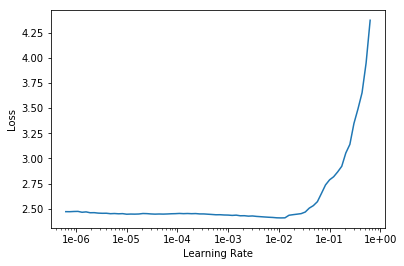

In [26]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time


In [0]:
learn.predict("Can't you see how much<br> ", 35)

"Can't you see how much<br>  haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku xxbos haiku"

In [0]:
haiku_list[:3]

["Can't you see how much<br> better you make the world just<br>by being in it?\n",
 "I'm fine. I'm listening<br> to music and eating lunch.<br>You're still an asshole.\n",
 'Your cat has no more<br> metaphysical value<br>than a deer or cow.\n']

In [4]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5, pretrained=True).load('awd1');

In [15]:
start_str = 'xxbos style: haiku\ndescription: none\npoem:\n'

In [23]:
print(learn.predict('', n_words=35, temperature=0.7))

 xxbos style : haiku 
  description : none 
  poem : 
  No one is respect 
  to give a someone also go 
  felt is doubt out . 
  xxeos xxbos style :
